# tensorflow에서 많이 사용되는 keras 학습하기

+ 출처 : https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [6]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)  # train label은 0부터 9 사이의 정수로 이루어져 있음

# test dataset 살펴보기
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


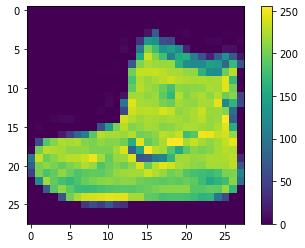

In [7]:
plt.figure
plt.imshow(train_images[0]) # imshow : image를 보여주는 method인 것 같다
plt.colorbar()  # colorbar : 기존 image 옆에 컬러바가 나타난다
plt.grid = False  # 그림 상단 위에 나왔던 grid 관련 영문 정보가 사라진다
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

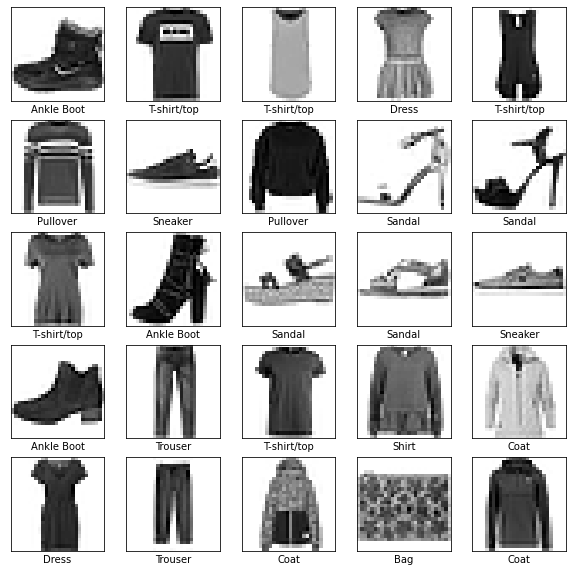

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.grid : False  # grid(False) 로 입력하면 TypeError가 발생한다
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show() 

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 결과값이 0 ~ 9 이므로 두 번째 노드의 개수를 10개로 한 듯
])

In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4949 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3715 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3361 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3116 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2942 - accuracy: 0.8907


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

313/313 - 1s - loss: 0.3537 - accuracy: 0.8749


+ test dataset에서 loss가 더 크고 accuracy가 더 작은 이유는 'overfitting' , 과대적합 때문이다.

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([5.4831758e-06, 1.4973480e-06, 7.8145613e-06, 3.5707396e-07,
       9.6123576e-06, 1.1450727e-02, 1.0106294e-05, 1.1583174e-01,
       2.7367775e-04, 8.7240905e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])
class_names[(np.argmax(predictions[0]))]

'Ankle Boot'

9번째 레이블의 prediction 값이 가장 크다 = model은 1번째 data가 9번(Ankle Boot)일 때의 신뢰도가 가장 높다고 평가하고 있다.
아래에서 test_labels[0]으로 결과를 확인해 보면, 마찬가지로 model은 신뢰도가 가장 높은 category를 label했음을 알 수 있다.

In [23]:
test_labels[0]  # model이 예측한 값이 맞는지 확인

9

#### 10개의 class에 대한 예측을 그래프로 표현해 보자!
+ 이때, def으로 함수를 사용한다.

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid : False
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
    
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid : False
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue') 

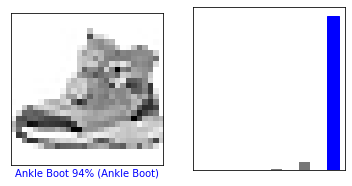

In [37]:
i=122
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

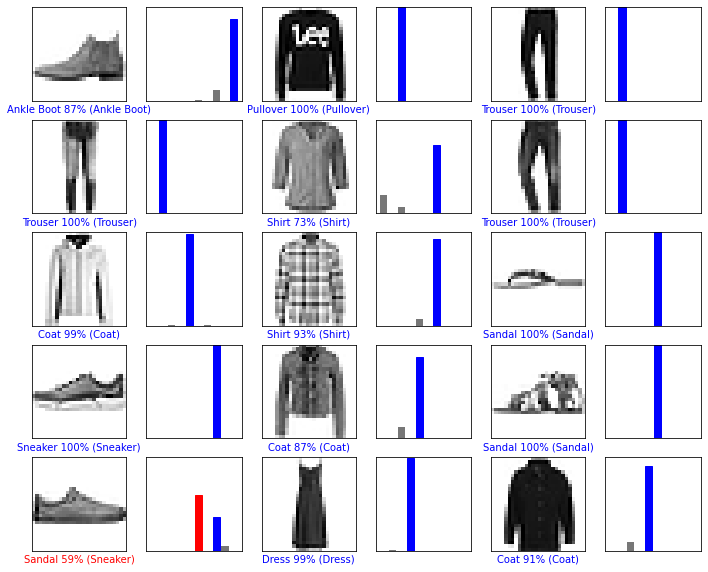

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()